In [1]:
import numpy as np
from matplotlib import pyplot as plt

from bounding_box_utils.bounding_box_utils import iou

from object_detection_2d_data_generator import DataGenerator
from transformations.object_detection_2d_patch_sampling_ops import *
from transformations.object_detection_2d_geometric_ops import *
from transformations.object_detection_2d_photometric_ops import *
from transformations.object_detection_2d_image_boxes_validation_utils import *
from data_augmentation_chains.data_augmentation_chain_original_ssd import *

%matplotlib inline

In [2]:
dataset = DataGenerator(labels_output_format=('class_id', 'xmin', 'ymin', 'xmax', 'ymax'))

In [7]:
images_dir         = '/home/omr/Desktop/LABEL_DONE/images/'
annotations_dir  = '/home/omr/Desktop/LABEL_DONE/annotations/'
image_set_filename = '/home/omr/Desktop/LABEL_DONE/imageset/imageset.txt'
image_gen_dir = '/home/omr/Desktop/LABEL_DONE/gen/'

# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['brace', 'repeatLeft', 'repeatRight', 'segno', 'coda', 
           'gClef', 'cClef', 'fClef', 'bar', 'doubleBar', 
           'BoldDoubleBar', 'dotBar', 'timeSig44', 'timeSig22', 'timeSig0',
           'timeSig1', 'timeSig2', 'timeSig3', 'timeSig4', 'timeSig5',
           'timeSig6', 'timeSig7', 'timeSig8', 'timeSig9', 'octupleWholeNote',
           'quadrupleWholeNote', 'doubleWholeNote', 'wholeNote', 'halfNote', 'noteHead', 
           'flag8thSingleU', 'flag8thSingleD', 'flag8thUp', 'flag8thDown', 'flag16thSingleU', 
           'flag16thSingleD', 'flag16thUp', 'flag16thDown', 'flag32thSingleU', 'flag32thSingleD', 
           'flag32thUp', 'flag32thDown', 'flag64thSingleU', 'flag64thSingleD', 'flag64thUp', 
           'flag64thDown', 'flag128thSingleU', 'flag128thSingleD', 'flag128thUp', 'flag128thDown', 
           'flag256thSingleU', 'flag256thSingleD', 'flag256thUp', 'flag256thDown', 'octupleWholeRest', 
           'quadrupleWholeRest', 'doubleWholeRest', 'wholeRest', 'halfRest', 'quarterRest0',
           'quarterRest1', '8thRest', '16thRest', '32thRest', '64thRest', 
           '128thRest', '256thRest',  'dot', 'ghost', 'multiMeasureRest', 
           'breathMark', 'caesura', 'flat', 'sharp', 'natural', 
           'doubleSharp', 'demiflat', 'flatAndHalf', 'demisharp', 'sharpAndHalf',
           'tie', 'slur', 'spiccato', 'tenuto', 'marcato', 
           'fermata', 'appoggiatura', 'acciaccatura', 'upBow', 'downBow', 
           'diminuendo', 'crescendo', 'piano', 'forte']



In [12]:
dd = dataset.parse_xml(images_dirs=[images_dir],
                      image_set_filenames=[image_set_filename],
                      annotations_dirs=[annotations_dir],
                      classes=classes,
                      include_classes='all',
                      exclude_truncated=False,
                      exclude_difficult=False,
                      ret=True)

imageset.txt: 100%|██████████| 881/881 [00:01<00:00, 534.61it/s]


In [13]:
label_num = 500
class_num = [0]*94
# for i in [24, 25, 26, 54, 55, 56, 76, 77, 78, 79, 82]:
#     class_num[i] = label_num
txt = []

for j in range(len(dd[1])):
    for a in dd[1][j]:
        class_num[a[0]] += 1
    txt.append(dd[2][j])
    
for i, n in enumerate(class_num):
    print(classes[i], ':', n)

brace : 0
repeatLeft : 9
repeatRight : 9
segno : 0
coda : 10
gClef : 106
cClef : 0
fClef : 78
bar : 350
doubleBar : 15
BoldDoubleBar : 0
dotBar : 0
timeSig44 : 12
timeSig22 : 10
timeSig0 : 9
timeSig1 : 23
timeSig2 : 24
timeSig3 : 13
timeSig4 : 29
timeSig5 : 6
timeSig6 : 14
timeSig7 : 8
timeSig8 : 6
timeSig9 : 4
octupleWholeNote : 0
quadrupleWholeNote : 0
doubleWholeNote : 0
wholeNote : 127
halfNote : 292
noteHead : 426
flag8thSingleU : 17
flag8thSingleD : 10
flag8thUp : 85
flag8thDown : 48
flag16thSingleU : 0
flag16thSingleD : 0
flag16thUp : 54
flag16thDown : 85
flag32thSingleU : 0
flag32thSingleD : 0
flag32thUp : 6
flag32thDown : 10
flag64thSingleU : 0
flag64thSingleD : 0
flag64thUp : 0
flag64thDown : 0
flag128thSingleU : 0
flag128thSingleD : 0
flag128thUp : 0
flag128thDown : 0
flag256thSingleU : 0
flag256thSingleD : 0
flag256thUp : 0
flag256thDown : 0
octupleWholeRest : 0
quadrupleWholeRest : 0
doubleWholeRest : 0
wholeRest : 34
halfRest : 37
quarterRest0 : 50
quarterRest1 : 0
8thRes

In [55]:

i = 0
while True:
    if i >= label_num: break
    for j in range(len(dd[1])):
        flag = False
        for a in dd[1][j]:
            if class_num[a[0]] >= label_num:
                flag = False
                break
            if class_num[a[0]] < label_num:
                flag = True
        if flag:
            txt.append(dd[2][j])
            for a in dd[1][j]:
                class_num[a[0]] += 1
    
    i += 1
    
'''

#     print("#########################")
#     break
#     if k >= 50: break
    sooo = sorted(class_num)
    print(sooo[40])
    for i, n in enumerate(class_num):
        print(classes[i], ':', n)
    print('\n\n\n')
    if sooo[40] >= label_num:
        print("##############################")
        break
    
'''    
for i, n in enumerate(class_num):
    print(classes[i], ':', n)


brace : 0
repeatLeft : 3
repeatRight : 3
segno : 0
coda : 1
gClef : 500
cClef : 39
fClef : 500
bar : 501
doubleBar : 500
BoldDoubleBar : 500
dotBar : 0
timeSig44 : 44
timeSig22 : 0
timeSig0 : 18
timeSig1 : 55
timeSig2 : 38
timeSig3 : 24
timeSig4 : 142
timeSig5 : 7
timeSig6 : 76
timeSig7 : 8
timeSig8 : 8
timeSig9 : 7
octupleWholeNote : 500
quadrupleWholeNote : 500
doubleWholeNote : 500
wholeNote : 500
halfNote : 500
noteHead : 502
flag8thSingleU : 18
flag8thSingleD : 12
flag8thUp : 151
flag8thDown : 60
flag16thSingleU : 0
flag16thSingleD : 0
flag16thUp : 45
flag16thDown : 78
flag32thSingleU : 0
flag32thSingleD : 0
flag32thUp : 6
flag32thDown : 10
flag64thSingleU : 0
flag64thSingleD : 0
flag64thUp : 0
flag64thDown : 0
flag128thSingleU : 0
flag128thSingleD : 0
flag128thUp : 0
flag128thDown : 0
flag256thSingleU : 0
flag256thSingleD : 0
flag256thUp : 0
flag256thDown : 0
octupleWholeRest : 500
quadrupleWholeRest : 500
doubleWholeRest : 500
wholeRest : 500
halfRest : 500
quarterRest0 : 500
qu

In [14]:
print("txt:", len(txt))
with open(image_set_filename, 'w') as file:
    for t in txt:
        file.write(t+'\n')

txt: 881


In [15]:
image_validator = ImageValidator(overlap_criterion='area',
                                 bounds=(0.3, 1.0),
                                 n_boxes_min=1)

box_filter = BoxFilter(overlap_criterion='area',
                       overlap_bounds=(0.8, 1.0))

random_translate = RandomTranslate(dy_minmax=(0.03,0.2),
                                   dx_minmax=(0.03,0.5),
                                   prob=0.8,
                                   clip_boxes=False,
                                   box_filter=box_filter,
                                   image_validator=image_validator,
                                   n_trials_max=3)

patch_coord_generator = PatchCoordinateGenerator(must_match='w_ar',
                                                 min_scale=0.8,
                                                 max_scale=1.2,
                                                 scale_uniformly=False,
                                                 min_aspect_ratio = 0.5,
                                                 max_aspect_ratio = 1.5)
random_patch          = RandomPatch(patch_coord_generator=patch_coord_generator,
                                    box_filter=box_filter,
                                    image_validator=image_validator,
                                    n_trials_max=10,
                                    clip_boxes=False,
                                    prob=0.8,
                                    can_fail=False)

# random_rotate = RandomRotate(angles=(90, 180), prob=1.0)

batch_size = 200

data_generator = dataset.generate(batch_size=batch_size,
                                  shuffle=False,
                                  transformations=[random_translate, random_patch],
                                  label_encoder=None,
                                  returns={'processed_images',
                                           'processed_labels',
                                           'filenames',
                                           'original_images',
                                           'original_labels'},
                                  keep_images_without_gt=False)

import pandas as pd
import cv2

labels = []
label_num = 2000
class_num = [0]*94
# for i in [24, 25, 26, 54, 55, 56, 76, 77, 78, 79, 82]:
#     class_num[i] = label_num

nname = 0
i = 0
while True:
#     try:
    processed_images, processed_annotations, filenames, original_images, original_annotations = next(data_generator)
    for j in range(len(processed_images)):
        flg = False
        for a in processed_annotations[j]:
            if class_num[a[0]] >= label_num:
                flg = False
                break
            if class_num[a[0]] < label_num: flg = True

        if flg:
            img = np.array(processed_images[j])
            cv2.imwrite(image_gen_dir + str(nname) + ".jpg", img)
            for a in processed_annotations[j]:
                class_num[a[0]] += 1
                labels.append([str(nname)+".jpg", img.shape[1], img.shape[0], classes[a[0]], a[1], a[2], a[3], a[4]]) 
            nname += 1
#     break
    print(i)
    i += 1
    if i >= 5000: break
#         sooo = sorted(class_num)
#         print(sooo[40])
#         if sooo[40] >= label_num:
#             print("#########################")
#             break
#     except:
#         print("failed")
#         break

print("finished", nname, "images\n\n")
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(labels, columns=column_name)
xml_df.to_csv('/home/omr/Desktop/LABEL_DONE/train_labels.csv', index=None)

lll = []
for i, n in enumerate(class_num):
    print(classes[i], ':', n)
    lll.append([classes[i], n])
    
lll_df = pd.DataFrame(lll)
lll_df.to_csv('/home/omr/Desktop/LABEL_DONE/data.csv', index=None)
# processed_images, processed_annotations, filenames, original_images, original_annotations = next(data_generator)
       
# i = 0 # Which batch item to look at
# # print(np.array(original_annotations).shape)
# print("Image:", filenames[i])
# print()
# print("Original ground truth boxes:\n")
# print(np.array(original_annotations[i]))
# print(np.array(processed_annotations[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [10]:
processed_images, processed_annotations, filenames, original_images, original_annotations = next(data_generator)
        

(186, 186)
(186, 186)


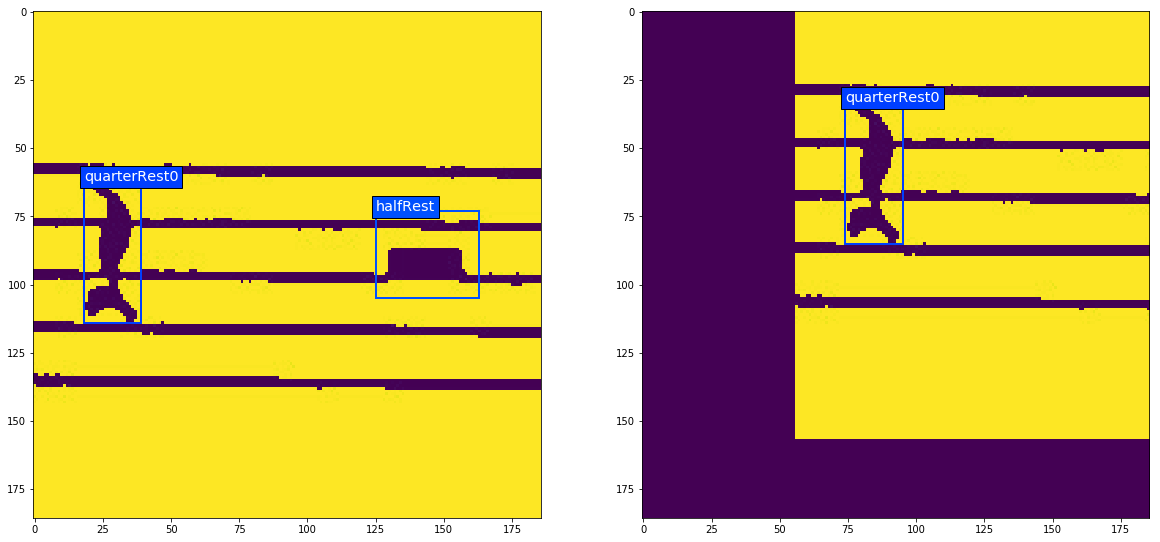

In [12]:
i = 0
colors = plt.cm.hsv(np.linspace(0, 1, len(classes))).tolist() # Set the colors for the bounding boxes

fig, cell = plt.subplots(1, 2, figsize=(20,16))
cell[0].imshow(original_images[i])
cell[1].imshow(processed_images[i])
print(original_images[i].shape)
print(processed_images[i].shape)
for box in original_annotations[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    color = colors[int(box[0])]
    label = '{}'.format(classes[int(box[0])])
    cell[0].add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    cell[0].text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})
    
for box in processed_annotations[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    color = colors[int(box[0])]
    label = '{}'.format(classes[int(box[0])])
    cell[1].add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    cell[1].text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

The first two arguments here are the same as for `BoxFilter`. The third argument, `n_boxes_min`, determines the minimum number of bounding boxes that need to meet the criteria in order for the transformed image to be accepted as valid. This particular `ImageValidator` object would accept a transformed image if at least one bounding box would have at least 0.3 of its area overlap with the transformed image.

Note that in the arguments of the `RandomTranslate` constructor, you pass both a `BoxFilter` and an `ImageValidator` object. This means the criteria by which the transformation decides which boxes to keep are not necessarily the same criteria as those by which the transformation decides whether a given transformed image is valid. This provides great flexibility, and in one of the next sections we'll see an example of a very successful object detection model that actually uses different criteria for box filtering and image validation in its data augmentation pipeline.

Of course `BoxFilter` and `ImageValidator` objects aren't relevant for all image transformations. For example, if you flip an image, the flipped image is guaranteed to fully contain all bounding boxes just as before the flip. Or if you apply photometric transformations to an image, its annotations don't even change at all. These transformations don't take `BoxFilter` or `ImageValidator` objects in their arguments because there is nothing to filter or validate.

### 1.4. Put together a data augmentation pipeline

The previous section was just foreplay to introduce you to how image transformations generally work by means of a concrete example.

Now we'll put together a real pipeline for image pre-processing and data augmentation. We'll first create the objects for all the transformations and then well arrange them in a list to produce our processing chain.

In [23]:
# Utility transformations
convert_to_3_channels = ConvertTo3Channels() # Make sure all images end up having 3 channels.
convert_RGB_to_HSV    = ConvertColor(current='RGB', to='HSV')
convert_HSV_to_RGB    = ConvertColor(current='HSV', to='RGB')
convert_to_float32    = ConvertDataType(to='float32')
convert_to_uint8      = ConvertDataType(to='uint8')
resize                = Resize(height=300, width=300)

# Photometric transformations
random_brightness     = RandomBrightness(lower=-48, upper=48, prob=0.5)
random_contrast       = RandomContrast(lower=0.5, upper=1.5, prob=0.5)
random_saturation     = RandomSaturation(lower=0.5, upper=1.5, prob=0.5)
random_hue            = RandomHue(max_delta=18, prob=0.5)

# Geometric transformations
random_flip           = RandomFlip(dim='horizontal', prob=0.5)
patch_coord_generator = PatchCoordinateGenerator(must_match='w_ar',
                                                 min_scale=0.3,
                                                 max_scale=2.0,
                                                 scale_uniformly=False,
                                                 min_aspect_ratio = 0.5,
                                                 max_aspect_ratio = 2.0)
random_patch          = RandomPatch(patch_coord_generator=patch_coord_generator,
                                    box_filter=box_filter,
                                    image_validator=image_validator,
                                    n_trials_max=10,
                                    clip_boxes=False,
                                    prob=1.0,
                                    can_fail=False)
# Define the processing chain
data_augmentation = [convert_to_3_channels,
                     convert_to_float32,
                     random_brightness,
                     random_contrast,
                     convert_to_uint8,
                     convert_RGB_to_HSV,
                     convert_to_float32,
                     random_saturation,
                     random_hue,
                     convert_to_uint8,
                     convert_HSV_to_RGB,
                     random_patch,
                     random_flip,
                     resize]

There's a lot happening in the code cell above. Let's break it down.

First, we're defining a bunch of utility transformations:
* `ConvertTo3Channels`: Regardless of which deep learning framework you're using, images within the same batch must always have the same shape, which means they must also have the same number of color channels. Some datasets contain a mix of 3-channel (e.g. RGB) and single-channel images. Some datasets might even contain a mix of 3-channel, 1-channel, and 4-channel images. This transformations converts any image to 3 channels if it isn't a 3-channel image already. This is basically just a safety transformation that we will put at the very beginning of our processing chain. If we were 100% certain that all images in our dataset had the same number of channels, we could omit this safety transformation, but often you aren't 100% certain.
* `ConvertColor`: Some of the photometric transformations require the images to be in RGB and others in HSV, so we need color space transformations to convert accordingly between these two color spaces.
* `ConvertDataType`: Some of the photometric transformations require the images to be in `float32` format, while some OpenCV functions like `cvtColor()` require the images to be in `uint8` format, so we need transformations to convert between those two datatypes.
* `Resize`: As mentioned above, images within the same batch must always have the same shape. The images in the Pascal VOC datasets have varying sizes, therefore we need to resize them to a fixed size. In our particular processing chain, this is not directly the reason why we need a resizing transformation though. We're sampling random patches of varying sizes and aspect ratios from the input images, so we need to resize those randomly sampled patches to a fixed size at the end. This resizing of images of varying aspect ratios has an intended side effect: It introduces random deformation. Some images will be stretched in one dimension and compressed in the other, etc. As long as the deformed objects are still recognizable, slight deformations are usually highly desirable in order to improve a model's ability to generalize.

Next, we're defining a bunch of photometric distortions:
* `RandomBrightness`: Randomly increases or reduces the brightness of images.
* `RandomContrast`: Randomly increases or reduces the contrast of images.
* `RandomSaturation`: Randomly increases or reduces the saturation of images.
* `RandomHue`: Randomly changes the hue of images.

Next, we're defining a few geometric transformations:
* `RandomFlip`: Randomly flips images, in our case horizontally.
* `RandomPatch`: Samples random patches from the input images according to the specifications defined in the `PatchCoordinateGenerator` (see below). Note that the `RandomPatch` transformation uses the box filter and image validator we defined earlier.
* `PatchCoordinateGenerator`: This is not a transformation. It's an object that generates random coordinates for patches according to specified criteria, and it is being passed to the `RandomPatch` constructor. In our example, the generated patches have an aspect ratio between 0.5 and 2.0 and their width is between 0.3 and 2.0 of the width of the input image. Note that this means that the generated patches can be larger than the input image in one or both spatial dimensions. This has a scaling effect: Patches that are smaller than the respective input image act as a "zoom-in" operation, while patches that are larger than the respective input image act as a "zoom-out" operation. In general, this `PatchCoordinateGenerator` makes the `RandomPatch` transformation ultimately flexible because it can produce random patches that meet any conceivable criteria.

Finally, we're arranging all of these transformations in an order that makes sense. This is certainly not the only order that would make sense, but it is one sensible order.

Let's look at the results of our data augmentation pipeline. For one last time, don't worry about the `generate()` method in the next code cell, we'll get to that in a moment. For now we just quickly want to flip through a few transformed images to visualize what our processing chain does.

In [24]:
batch_size = 1

data_generator = dataset.generate(batch_size=batch_size,
                                  shuffle=False,
                                  transformations=data_augmentation,
                                  label_encoder=None,
                                  returns={'processed_images',
                                           'processed_labels',
                                           'filenames',
                                           'original_images',
                                           'original_labels'},
                                  keep_images_without_gt=False)

In [25]:
processed_images, processed_annotations, filenames, original_images, original_annotations = next(data_generator)

i = 0 # Which batch item to look at


print("Image:", filenames[i])
print()
print("Original ground truth boxes:\n")
print(np.array(original_annotations[i]))

Image: /home/omr/Desktop/LABEL_DONE/images/IMG_7804_0_10.jpg

Original ground truth boxes:

[[ 59  18  62  39 114]
 [ 58 125  73 163 105]]


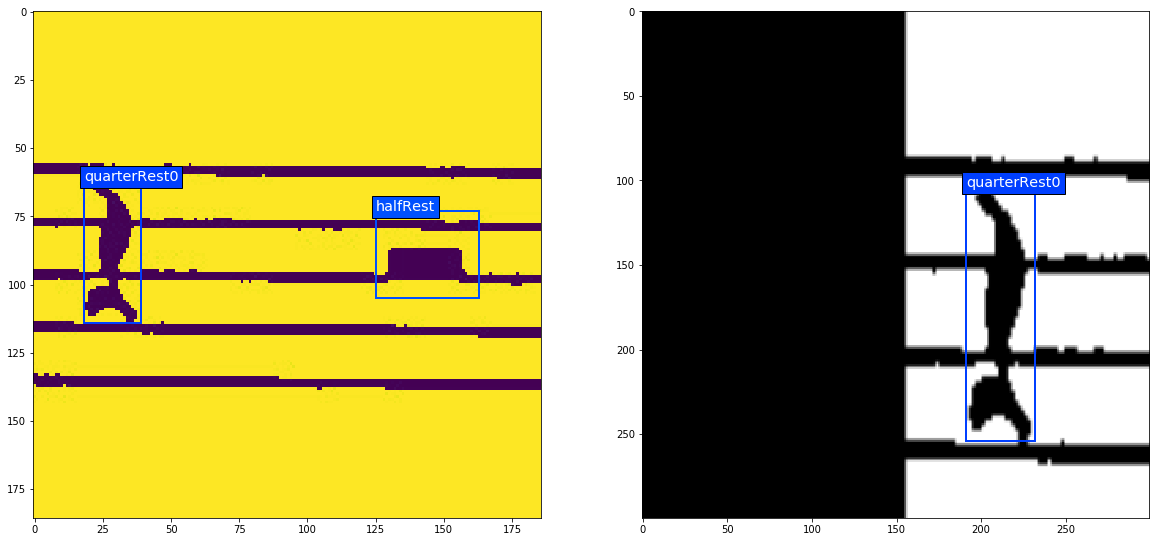

In [26]:
colors = plt.cm.hsv(np.linspace(0, 1, len(classes))).tolist() # Set the colors for the bounding boxes

fig, cell = plt.subplots(1, 2, figsize=(20,16))
cell[0].imshow(original_images[i])
cell[1].imshow(processed_images[i])

for box in original_annotations[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    color = colors[int(box[0])]
    label = '{}'.format(classes[int(box[0])])
    cell[0].add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    cell[0].text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})
    
for box in processed_annotations[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    color = colors[int(box[0])]
    label = '{}'.format(classes[int(box[0])])
    cell[1].add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    cell[1].text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})